***Classification with classical ML methods***

*Here I test the performance of various classical ML methods for classification*

* - K Nearest neighbors 
* - Decision Tree
* - Random Forest 


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('PR-graphomics/reduced_graphomics.csv')





**KNN**

As a first step I built a search algorithm that goes through different values of K and verify performance on the best of the batch:



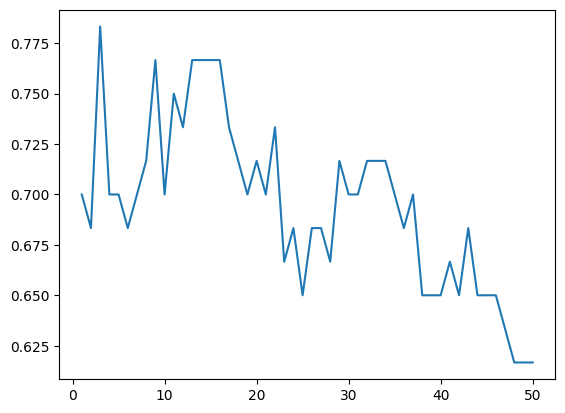

Accuracy: 0.72, with number of neighbors 3

Classification Report:
              precision    recall  f1-score   support

          PD       0.58      0.50      0.54        30
   Prodromal       0.56      0.63      0.59        30

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.56        60
weighted avg       0.57      0.57      0.56        60



In [4]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = pd.DataFrame.copy(df)
y = X.pop('Group')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cont, y_test, y_cont = train_test_split(X_test, y_test, test_size=.5, random_state=42)
# Initialize the KNN classifier with k=5
nearest_neighbors = np.arange(1, 51)
accuracies = []
for nn in nearest_neighbors:
    knn = KNeighborsClassifier(n_neighbors=nn)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy and print a classification report
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    #print(f"Accuracy: {accuracy:.2f}, with number of neighbors {nn}")

#shows the results of spanning the various values of nn
plt.plot(nearest_neighbors, accuracies)
plt.show()

nn = nearest_neighbors[np.argmax(np.array(accuracies))]
knn = KNeighborsClassifier(n_neighbors=nn)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_cont)

accuracy = accuracy_score(y_cont, y_pred)
print(f"Accuracy: {accuracy:.2f}, with number of neighbors {nn}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

To improve performance, chatGPT suggest to: 
- check for other parameters (distance metrics, weight vs distance...)
- standardize the inputs

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Assuming reduced_data is already loaded
X = pd.DataFrame.copy(df)
y = X.pop('Group')

# Encode the target labels (to avoid constant warnings by the grid search)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cont, y_test, y_cont = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_cont = scaler.transform(X_cont)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found:", best_params)
print(f"Best cross-validated accuracy: {best_score:.2f}")

# Train a final model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_knn.predict(X_cont)
accuracy = accuracy_score(y_cont, y_pred)
print(f"Final model accuracy on test set: {accuracy:.2f}")

print("\nClassification Report on Test Set:")
print(classification_report(y_cont, y_pred, target_names=label_encoder.classes_))

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best cross-validated accuracy: 0.81
Final model accuracy on test set: 0.80

Classification Report on Test Set:
              precision    recall  f1-score   support

          PD       0.79      0.84      0.81        31
   Prodromal       0.81      0.76      0.79        29

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



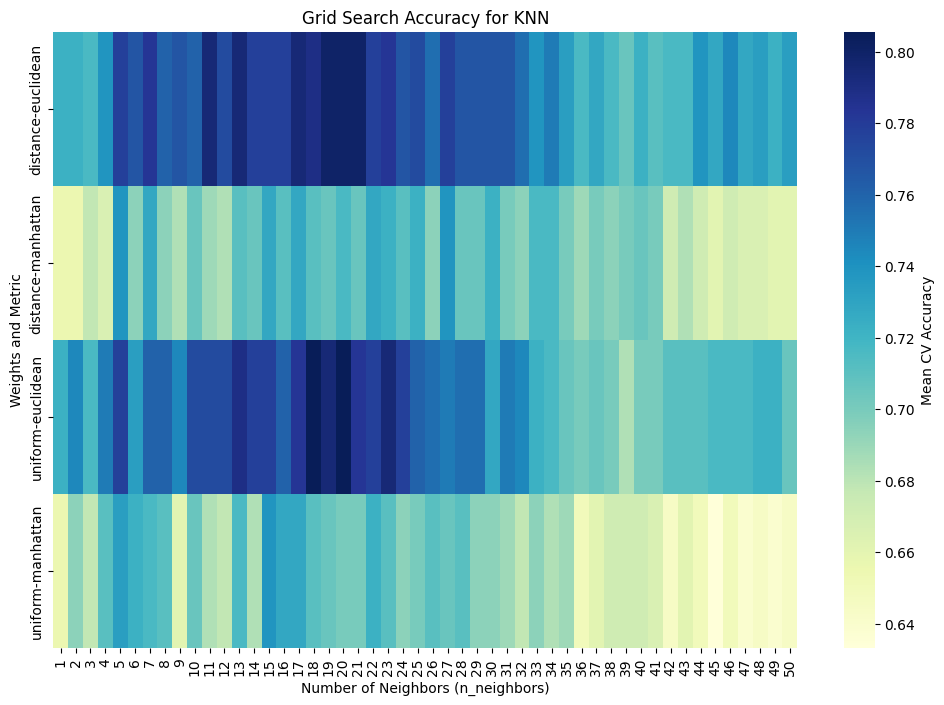

In [17]:
import seaborn as sns
# Convert grid search results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table to structure data for the heatmap
pivot_table = results_df.pivot_table(
    values="mean_test_score",
    index=["param_weights", "param_metric"],
    columns="param_n_neighbors"
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV Accuracy'})
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Weights and Metric")
plt.title("Grid Search Accuracy for KNN")
plt.show()

**Decision Trees and Random Forests**

- performance here sucks even more with my method, let's see what chat thinks about it


In [18]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = pd.DataFrame.copy(df)
y = X.pop('Group')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42, min_samples_split= 2)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split= 2)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Evaluate the Random Forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Decision Tree Accuracy: 0.74

Decision Tree Classification Report:
              precision    recall  f1-score   support

          PD       0.74      0.81      0.77        48
   Prodromal       0.76      0.67      0.71        42

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.74      0.74        90

Random Forest Accuracy: 0.84

Random Forest Classification Report:
              precision    recall  f1-score   support

          PD       0.84      0.88      0.86        48
   Prodromal       0.85      0.81      0.83        42

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



Chat now suggest to explore the following variables:
-  max_depth, min_samples_split, and min_samples_leaf for the decision tree
-  n_estimators, max_depth, min_samples_split, and min_samples_leaf for the random forest
  

here we present the two param. explorations, separately

Best parameters for Decision Tree: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy for Decision Tree: 0.86
Final Decision Tree accuracy on test set: 0.87

Decision Tree Classification Report:
              precision    recall  f1-score   support

          PD       0.93      0.81      0.87        48
   Prodromal       0.81      0.93      0.87        42

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



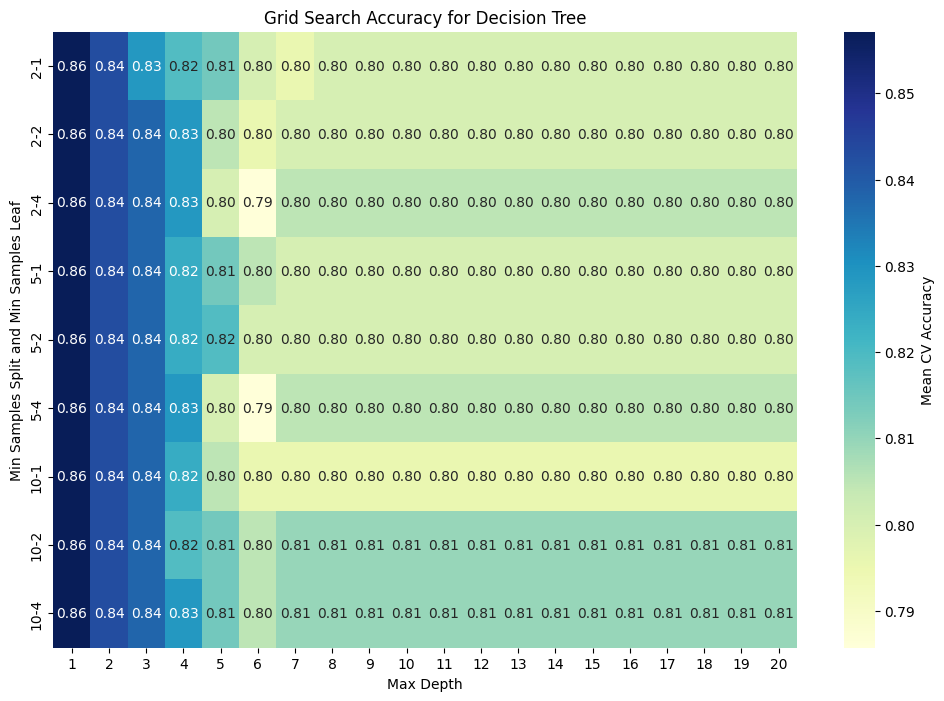

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded
X = pd.DataFrame.copy(df)
y = X.pop('Group')

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid_tree = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree and GridSearchCV
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_
print("Best parameters for Decision Tree:", best_params_tree)
print(f"Best cross-validated accuracy for Decision Tree: {best_score_tree:.2f}")

# Train a final model with the best parameters
best_tree = DecisionTreeClassifier(**best_params_tree, random_state=42)
best_tree.fit(X_train, y_train)

# Evaluate on the test set
y_pred_tree = best_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Final Decision Tree accuracy on test set: {accuracy_tree:.2f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=label_encoder.classes_))

# Convert grid search results to a DataFrame for heatmap plotting
results_df_tree = pd.DataFrame(grid_search_tree.cv_results_)

# Create a pivot table to structure data for the heatmap
pivot_table_tree = results_df_tree.pivot_table(
    values="mean_test_score",
    index=["param_min_samples_split", "param_min_samples_leaf"],
    columns="param_max_depth"
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_tree, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV Accuracy'})
plt.xlabel("Max Depth")
plt.ylabel("Min Samples Split and Min Samples Leaf")
plt.title("Grid Search Accuracy for Decision Tree")
plt.show()


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated accuracy for Random Forest: 0.83
Final Random Forest accuracy on test set: 0.86

Random Forest Classification Report:
              precision    recall  f1-score   support

          PD       0.86      0.88      0.87        48
   Prodromal       0.85      0.83      0.84        42

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



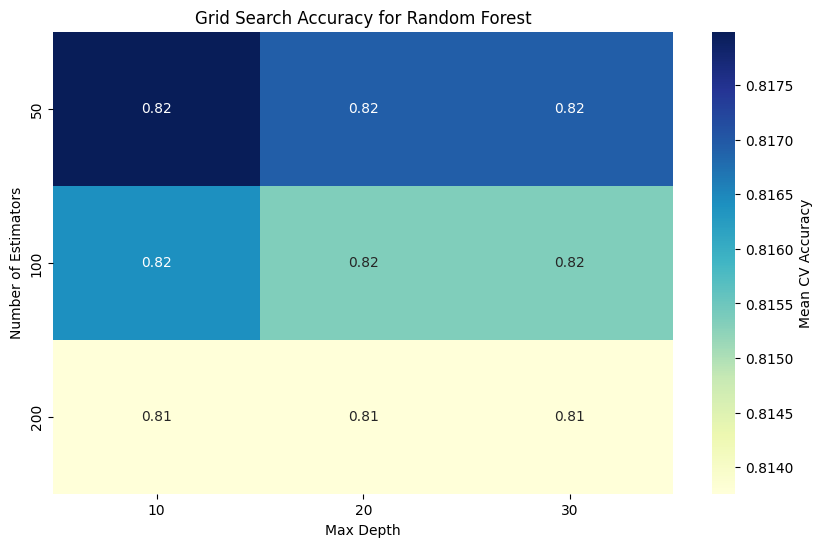

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Set up the parameter grid for GridSearchCV
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest and GridSearchCV
random_forest = RandomForestClassifier(random_state=42)
grid_search_forest = GridSearchCV(random_forest, param_grid_forest, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_forest.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params_forest = grid_search_forest.best_params_
best_score_forest = grid_search_forest.best_score_
print("Best parameters for Random Forest:", best_params_forest)
print(f"Best cross-validated accuracy for Random Forest: {best_score_forest:.2f}")

# Train a final model with the best parameters
best_forest = RandomForestClassifier(**best_params_forest, random_state=42)
best_forest.fit(X_train, y_train)

# Evaluate on the test set
y_pred_forest = best_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Final Random Forest accuracy on test set: {accuracy_forest:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest, target_names=label_encoder.classes_))

# Convert grid search results to a DataFrame for heatmap plotting
results_df_forest = pd.DataFrame(grid_search_forest.cv_results_)

# Filter only relevant columns for heatmap
# (Due to multidimensionality, we’ll focus on one heatmap for each combination)

# Pivot table for max_depth and n_estimators
pivot_table_forest = results_df_forest.pivot_table(
    values="mean_test_score",
    index="param_n_estimators",
    columns="param_max_depth"
)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_forest, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV Accuracy'})
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.title("Grid Search Accuracy for Random Forest")
plt.show()


**Cross-Validation for Small Datasets**


In this case, using k-fold cross-validation is a great strategy. It will allow each sample to be in both the training and test sets at some point, effectively making better use of all available data. This is especially useful with a smaller dataset because it reduces the variance in performance estimates.

Let’s set up cross-validation for each model and use StratifiedKFold to preserve the distribution of classes within each fold, which is helpful for balanced binary classification.

NOTE: The following code does not use best parameters found in the previous code; fix it before claiming results

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Set up Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = make_scorer(accuracy_score)

# Initialize models with best hyperparameters found from Grid Search
# (Replace with your actual best parameters if they differ)
best_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
best_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Cross-validation for KNN
knn_cv_scores = cross_val_score(best_knn, X, y, cv=cv, scoring=scoring)
print(f"KNN Average Accuracy: {knn_cv_scores.mean():.2f} ± {knn_cv_scores.std():.2f}")

# Cross-validation for Decision Tree
tree_cv_scores = cross_val_score(best_tree, X, y, cv=cv, scoring=scoring)
print(f"Decision Tree Average Accuracy: {tree_cv_scores.mean():.2f} ± {tree_cv_scores.std():.2f}")

# Cross-validation for Random Forest
forest_cv_scores = cross_val_score(best_forest, X, y, cv=cv, scoring=scoring)
print(f"Random Forest Average Accuracy: {forest_cv_scores.mean():.2f} ± {forest_cv_scores.std():.2f}")


KNN Average Accuracy: 0.79 ± 0.09
Decision Tree Average Accuracy: 0.81 ± 0.04
Random Forest Average Accuracy: 0.84 ± 0.07


***PCA tests***

PCA should help disentangling dependencies in the original dataset, creating something more easy to handle with classical classification techniques; especially for KNN.

NOTE: not sure on how it will handle so many correlated data. Let's see ; )

In [ ]:
#Direct implementation of the method, with the target of explaining 95% of the variance

from sklearn.decomposition import PCA


pca_input = pd.read_csv('PR-graphomics/expanded_graphomics.csv')
targets = pca_input.pop('Group')
# Standardize the dataset (important for PCA)

print(f"Starting PCA with {len(pca_input.keys())}")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_input)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Check how many components were selected to reach 95% variance
n_components = pca.n_components_
print(f"Number of components to retain 95% variance: {n_components}")

# Explained variance of each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Resulting dataset with reduced features
X_reduced = pd.DataFrame(X_pca)
print(f"Shape of reduced dataset: {X_reduced.shape}")


Starting PCA with 68
Number of components to retain 95% variance: 14
Explained variance by each component: [0.41516438 0.29753441 0.07999705 0.02941291 0.02166861 0.01917607
 0.01605935 0.01456719 0.01331298 0.01163206 0.01097735 0.01054267
 0.00905066 0.00710011]
Shape of reduced dataset: (300, 14)


In [25]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4, random_state=42)
X_test, X_cont, y_test, y_cont = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_cont = scaler.transform(X_cont)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found:", best_params)
print(f"Best cross-validated accuracy: {best_score:.2f}")

# Train a final model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_knn.predict(X_cont)
accuracy = accuracy_score(y_cont, y_pred)
print(f"Final model accuracy on test set: {accuracy:.2f}")

print("\nClassification Report on Test Set:")
print(classification_report(y_cont, y_pred, target_names=label_encoder.classes_))

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Best cross-validated accuracy: 0.84
Final model accuracy on test set: 0.72

Classification Report on Test Set:
              precision    recall  f1-score   support

          PD       0.82      0.58      0.68        31
   Prodromal       0.66      0.86      0.75        29

    accuracy                           0.72        60
   macro avg       0.74      0.72      0.71        60
weighted avg       0.74      0.72      0.71        60



Results do not differ significantly from the reduced dataset ones: further testing is needed to understand if this is due to a performance which is already close to the maximum, or other factors.

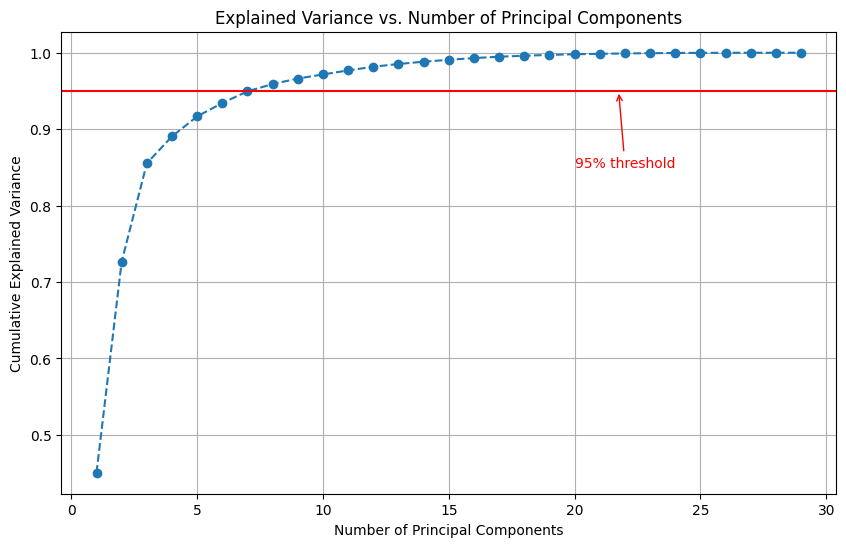

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4, random_state=42)
X_test, X_cont, y_test, y_cont = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA without limiting n_components to get all components initially
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.annotate('95% threshold', xy=(len(cumulative_explained_variance) * 0.75, 0.95), color='red', xytext=(20, 0.85),
             arrowprops=dict(arrowstyle="->", color='red'))
plt.grid(True)
plt.show()